## SEABORN

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### Dataset de ejemplo: "iris"
    sns.load_dataset("dataset")

In [3]:
data = sns.load_dataset("iris")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Grafico de dispersion 
    Identificar relaciones
    Detectar patrones
    
    sns.scatterplot(data=,x=,y=,hue=)

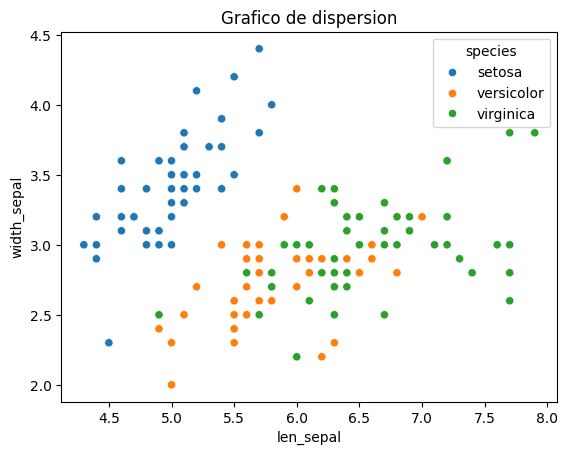

In [4]:
# .scatterplot(x="nombre_x", y="nombre_y" , hue="categoria a dispersar", data=variable con los datos)
#debe coincidir las x e y con las columnas. los nombre se cambian en el label.
sns.scatterplot(x="sepal_length", y="sepal_width", hue="species", data=data)
plt.xlabel("len_sepal")
plt.ylabel("width_sepal")
plt.title("Grafico de dispersion")
plt.show()

### Grafica de Ridgeplot
    Mostrar cambios a lo largo del tiempo o categorías
     
    sns.kdeplot(data=,label=",fill=)

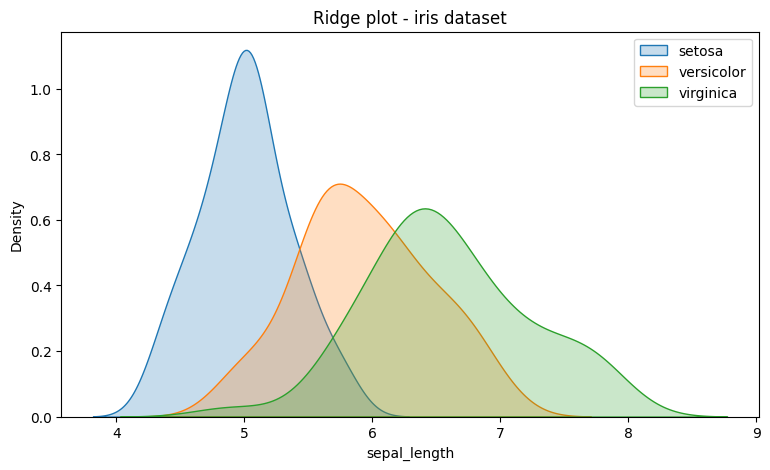

In [6]:
#creamos las variables que contienen las especies
setosa = data[data["species"] == "setosa"]
versicolor = data[data["species"] == "versicolor"]
virginica = data[data["species"] == "virginica"]

#configuramos la figura (lienzo, subtramas) y ejes (tamaño maximo del grafico)
fig, ax = plt.subplots(figsize =(9,5))
plt.xlabel("sepal_length") 

#crear el ridge plot usando .kdeplot(data="variable["columna"]", label="nombre de la variable", ax = ax, fill=True)
sns.kdeplot(data=setosa["sepal_length"], label="setosa", ax = ax, fill=True)
sns.kdeplot(data=versicolor["sepal_length"], label="versicolor", ax = ax, fill=True)
sns.kdeplot(data=virginica["sepal_length"], label="virginica", ax = ax, fill=True)

#donde mostrar las referencias de los colores
ax.legend(loc="upper right",) 
plt.title("Ridge plot - iris dataset")
plt.show()

### Histogramas/Dispersion
    Determinar la frecuencia de ocurrencia
    Comparar distribuciones
    
    sns.scatter()
    sns.histplot()

Text(0.5, 1.0, 'histograma edad')

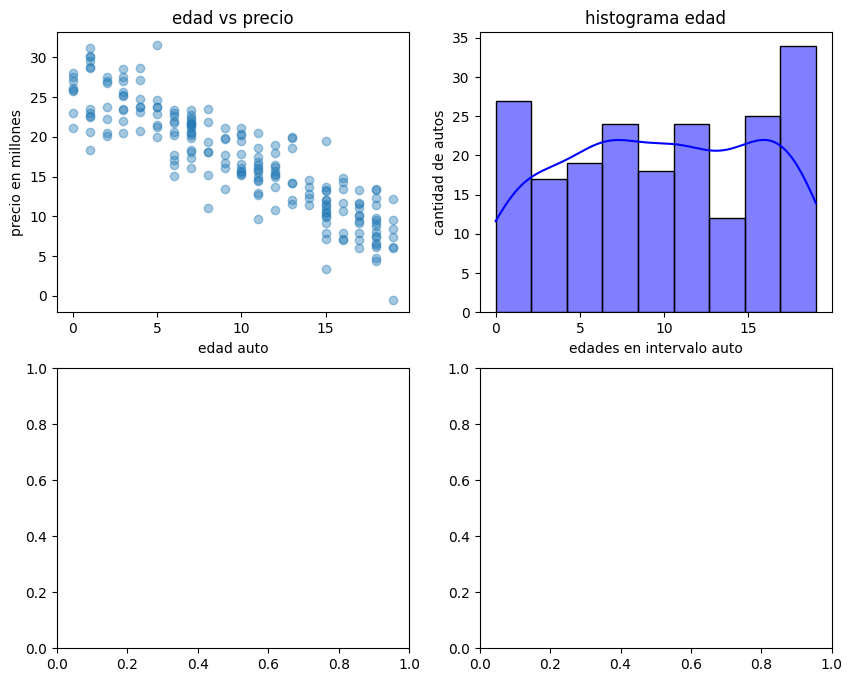

In [7]:
#como generar datos aleatorios en grandes cantidades para analizar
#200 autos entre edades de 0 y 20
edad_autos = np.random.randint(0,20,size=200) 
#el 30 es para que no de negativo su precio
precio_autos = 30 - edad_autos + np.random.normal(-3,3, size=200) 
df = pd.DataFrame({
  "edad": edad_autos,
  "precio": precio_autos  
})
df
#creacion del grafico 
# plt.subplots(cantidad_filas, cantidad_columnas, ancho_grafico, alto_grafico)
fig, ax = plt.subplots(2,2, figsize =(10,8))

#grafico de dispersion 
#ax[fila del grafico a modificar, columna del grafico a modificar]
# .scatter(df[x], df[y], alpha = 1) 
#alpha = 1 = opaco. alpha = 0 = invisible
ax[0,0].scatter(df["edad"], df["precio"], alpha = 0.4) 
ax[0,0].set_xlabel("edad auto")
ax[0,0].set_ylabel("precio en millones")
ax[0,0].set_title("edad vs precio")

#histograma del precio. grafica la cantidad (y) de intervalos en un rango (x)
#kde agrega la curva al grafico para complementar la informacion 
sns.histplot(df["edad"], ax = ax[0,1], kde=True, color="b",) 
ax[0,1].set_xlabel("edades en intervalo auto")
ax[0,1].set_ylabel("cantidad de autos")
ax[0,1].set_title("histograma edad")

### Eliminar grafico/ Acceder a datos/ Info/ Descripción
    .axis("off")
    df.head()
    df.info()
    df.describe()

In [8]:
#eliminar un grafico (el ultimo)
ax[1,1].axis("off")
plt.subplots_adjust(wspace= 0.3, hspace=0.3) #espaciado (padding) entre graficos
plt.show()
#dataset de ejemplo. dataframe creado a partir de un datast
df = sns.load_dataset("tips")

#acceder a los primeros datos
df.head()

#informacion del df
df.info()
#descripcion del df en numeros 
df.describe()

<Figure size 640x480 with 0 Axes>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### Análisis exploratorio univariado (una sola variable) de las propinas
    sns.histplot()
    sns.kdeplot()
    sns.boxplot()
    

<Axes: xlabel='total_bill'>

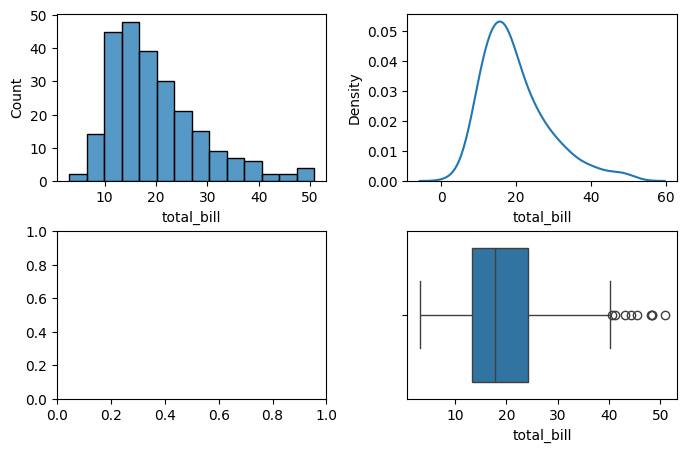

In [9]:
#analisis exploratorio univariado en graficos (una sola variable a analizar)

fig, ax = plt.subplots(2,2, figsize =(8,5))
plt.subplots_adjust(wspace= 0.3, hspace=0.3)

sns.histplot(data=df, x="total_bill", ax=ax[0,0]) #histograma en barras
sns.kdeplot(data=df, x="total_bill", ax=ax[0,1]) #linea media 
sns.boxplot(data=df, x="total_bill", ax=ax[1,1]) #mediana y quartiles 

### Análisis exploratorio bivariado (2 variables) de las propinas y su genero
    sns.scatterplot()
    sns.barplot()

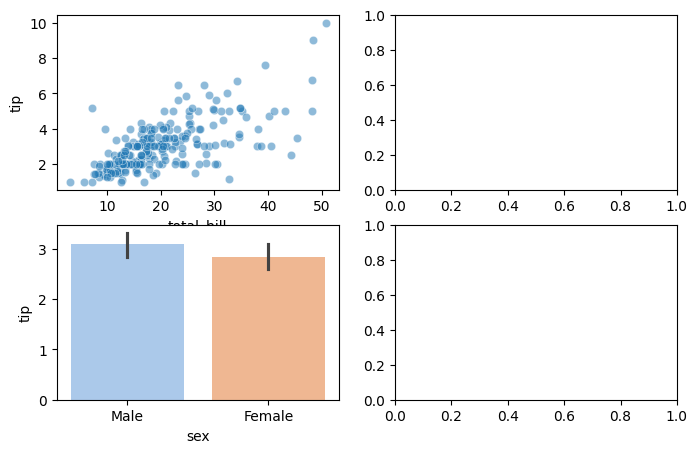

In [12]:
#analisis exploratorio bivariado (2 variables a analizar)

fig, ax = plt.subplots(2,2, figsize = (8,5))

sns.scatterplot(data=df, x="total_bill", y="tip", ax=ax[0,0], alpha=0.5) #de dispersion en puntos
sns.barplot(data=df, x="sex", y="tip", ax=ax[1,0], hue="sex", palette="pastel") #grafico de barras
plt.show()


### Análisis multivariado (muchas variables) en relacion al genero
    sns.pairplot()

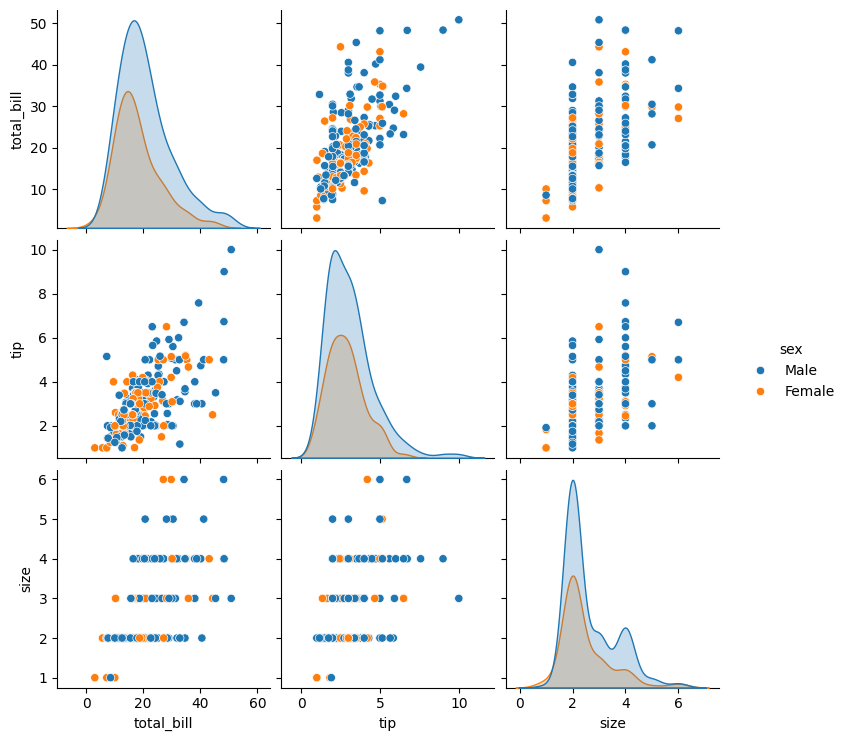

In [11]:
#grafico multivariado
# se comparan todas las variables contra todas las variables que sean numericas
sns.pairplot(data=df, hue="sex",)